### Spark Funds Investment Assignment


#### Data Exploration


In [1]:
### Import all libraries needed for data frame downloading and clearnace.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### Reading data from 3 diffrent frames.

#read companies.csv in companies
companies = pd.read_csv(r"C:\Users\alex\Documents\Python Scripts\Assignments\companies.csv", encoding= 'ANSI')

#read rounds2.csv in rounds2
rounds2 = pd.read_csv(r"C:\Users\alex\Documents\Python Scripts\Assignments\rounds2.csv", encoding= 'ANSI')

#Mapping file
mapping = pd.read_csv(r"C:\Users\alex\Documents\Python Scripts\Assignments\mapping.csv", encoding= 'ANSI')

### Data Inspection


In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [10]:
### check the number of columns
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [11]:
#find size of companies dataframe
companies.shape

(66368, 10)

In [12]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [17]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [18]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Exponential-Entertainment,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [14]:
#shape of round2 table
rounds2.shape

(114949, 6)

In [15]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [16]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [19]:
rounds2.head()    

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [20]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [21]:
###Question How many unique companies are present in the companies file??
len(companies['permalink'].unique())

66368

In [22]:
### convert permalink in companies dataframe for lowercase to verify uniform values
companies['permalink'] = companies['permalink'].str.lower()

In [23]:
###again recheck the value of companies in company dataframe  with unique values
len(companies['permalink'].unique())

66368

In [24]:
###Question How many unique companies are present in the rounds2 file??.
len(rounds2['company_permalink'].unique())

90247

In [25]:
### convert permalink in rounds2 dataframe for lowercase to verify uniform values
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [26]:
###Again recheck the value of unique value from roudn2 dataset after checking uniformity.
len(rounds2['company_permalink'].unique())

66368

In [27]:
###Question Are there any companies in the rounds2 file which are not  present in companies ?
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [28]:
###check with unique value from common data element from both  dataframes.
rounds2.company_permalink.isin(companies.permalink).astype(int).head()

0    1
1    1
2    1
3    1
4    1
Name: company_permalink, dtype: int32

In [30]:
###check total missing values in rounds2 dataframe for column wise.
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

#### Now, we have found the unique values in from both companies and rounds2 dataframes. We will move further to merge the both data frames with inner join which joins one dataframe value on left side and other column value to right side of master frame.Hence, we would analyse with pd.merge command.

In [31]:
##question Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?
master_frame = pd.merge(companies, rounds2, how="inner", left_on="permalink", right_on="company_permalink")
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [32]:
###shape of master_frame dataframe
master_frame.shape

(114949, 16)

In [35]:
master_frame.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [36]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

In [37]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [38]:
###describe function used for to find the median, mean , 50% , 75% and max values from master_frame dataframe.
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [39]:
###As permalink and company_permalink has same values without any missing data. We will drop the column for redudancy.
master_frame = master_frame.drop(['company_permalink'], axis=1)

In [40]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  funding_round_permalink  114949 non-null  object 
 11  funding_round_type       114949 non-null  object 
 12  funding_round_code       31140 non-null   object 
 13  funded_at                114949 non-null  object 
 14  rais

In [41]:
###Recheck the shape of master_frame dataframe after dropping the columns
master_frame.shape

(114949, 15)

In [42]:
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [45]:
###finding the fraction of master_frame for total missing values/ length of columns for each column level for percentage data values & rounding 2 with fraction of missing values and total index values.

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

#### As per obersvation from above cell, funding_round_code has 73% missing values and founded_at had 18% missing values.For our business objective, we need the raised_amount_usd, country_code , category_list. Thus, remaining columns can be dropped as they are not needed and those are having missing or wrong data which is very difficult to compute it.

In [46]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  funding_round_permalink  114949 non-null  object 
 11  funding_round_type       114949 non-null  object 
 12  funding_round_code       31140 non-null   object 
 13  funded_at                114949 non-null  object 
 14  rais

In [47]:
#### Dropping columns which are not necessary and having wrong data too
master_frame = master_frame.drop(['homepage_url', 'state_code', 'founded_at', 'funded_at', 'region', 'city', 'funding_round_code'], axis=1)
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0


In [50]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   category_list            111539 non-null  object 
 3   status                   114949 non-null  object 
 4   country_code             106271 non-null  object 
 5   funding_round_permalink  114949 non-null  object 
 6   funding_round_type       114949 non-null  object 
 7   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(7)
memory usage: 7.9+ MB


In [51]:
###Recheck the remaining columns with proper values
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
raised_amount_usd          17.39
dtype: float64

In [52]:
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [54]:
master_frame['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [55]:
#### dropping rows at raised_amount_usd column for wrong data 
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [56]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                94959 non-null  object 
 1   name                     94958 non-null  object 
 2   category_list            93915 non-null  object 
 3   status                   94959 non-null  object 
 4   country_code             89108 non-null  object 
 5   funding_round_permalink  94959 non-null  object 
 6   funding_round_type       94959 non-null  object 
 7   raised_amount_usd        94959 non-null  float64
dtypes: float64(1), object(7)
memory usage: 6.5+ MB


In [57]:
#### after dropping missing values and convered to to fraction of data for column wise
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
raised_amount_usd          0.00
dtype: float64

In [58]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.0


In [59]:
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


### Check Point 2 Funding Type Analysis

In [60]:
#### Checking four investment types and finding which suitable investment type for representing the value of investment type.

df = master_frame[(master_frame.funding_round_type == 'venture') | (master_frame.funding_round_type == 'seed') | (master_frame.funding_round_type == 'angel') | (master_frame.funding_round_type == 'private_equity')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.0


AttributeError: 'AxesSubplot' object has no attribute 'show'

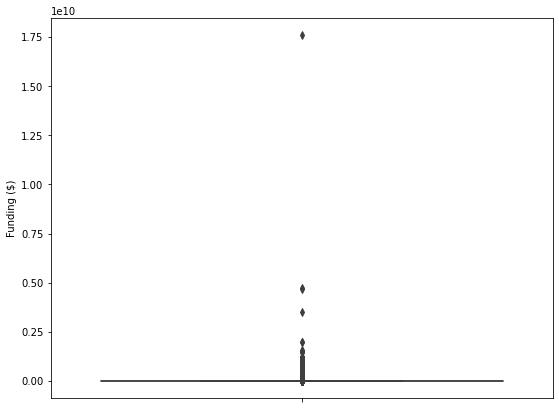

In [63]:
### The distribution of raised_amount_usd to get a sense of the distribution of data across .
plt.figure(figsize=[9,7])
import matplotlib.pyplot as plt
import seaborn as sns
plt = sns.boxplot(y=df['raised_amount_usd'])
plt.set(ylabel = 'Funding ($)')
plt.show()

In [64]:
#### converting to USD dollar value
df['raised_amount_usd'] = round(df['raised_amount_usd']/1000000, 2)

<ipython-input-64-c845f2f1099b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['raised_amount_usd'] = round(df['raised_amount_usd']/1000000, 2)


In [65]:
df['raised_amount_usd'].describe()

count    80627.000000
mean         9.347962
std         75.629401
min          0.000000
25%          0.400000
50%          2.000000
75%          7.975000
max      17600.000000
Name: raised_amount_usd, dtype: float64

In [66]:
df['raised_amount_usd'].value_counts()

1.00     2565
0.02     2424
2.00     2033
0.50     1913
10.00    1910
         ... 
60.75       1
28.96       1
41.72       1
44.94       1
43.35       1
Name: raised_amount_usd, Length: 3033, dtype: int64

In [67]:
df.shape

(80627, 8)

In [68]:
df.describe()

,raised_amount_usd
count,80627.000000
mean,9.347962
std,75.629401
min,0.000000
25%,0.400000
50%,2.000000
75%,7.975000
max,17600.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80627 entries, 0 to 114947
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                80627 non-null  object 
 1   name                     80626 non-null  object 
 2   category_list            79772 non-null  object 
 3   status                   80627 non-null  object 
 4   country_code             75606 non-null  object 
 5   funding_round_permalink  80627 non-null  object 
 6   funding_round_type       80627 non-null  object 
 7   raised_amount_usd        80627 non-null  float64
dtypes: float64(1), object(7)
memory usage: 5.5+ MB


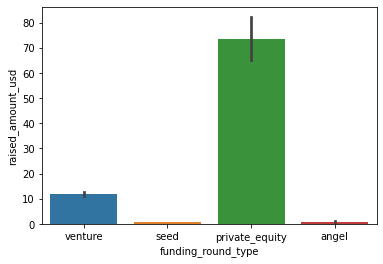

In [72]:
###compare across each category for diffrent investment types and create bar plot.
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=df, dodge=False)
plt.show()

In [73]:
###calculate the mean and median across four categories using agg function.
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                   mean  \
funding_round_type  angel private_equity  seed venture     angel   
raised_amount_usd     0.4           20.0  0.28     5.0  0.958576   

                                                        
funding_round_type private_equity      seed    venture  
raised_amount_usd       73.308574  0.719754  11.748939

In [74]:
###lets compare the median and mean for finding actual representative funding amount for diffrent investment types.
df.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    73.308574
venture           11.748939
angel              0.958576
seed               0.719754
Name: raised_amount_usd, dtype: float64

In [75]:
### Find the median value by grouping data.
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20.00
venture            5.00
angel              0.40
seed               0.28
Name: raised_amount_usd, dtype: float64

### Checkpoint 3 Country Analysis

#### Now we know that venture is best investment type which suited within range of 5 to 15 million USD. So, we are carring out our operation on finding the top3 countries on this investment type.


In [89]:
###find the venture type of investment
df = df[df.funding_round_type == 'venture']

In [100]:
### now create top9 dataframe with top nine countries that have highest round of amount
top9 = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
top9[:9]

country_code
USA    422510.47
GBR     20245.59
IND     14391.91
Name: raised_amount_usd, dtype: float64

In [103]:
### Now we know from above information top 3 countries are USA, GBR  and IND are ennglish speaking countries. Lets find the data for top three countries of data.
df_coun = df[(df.country_code =='USA') | (df.country_code =='GBR') | (df.country_code =='IND')]
df.head()
 
#top9.con = df[(df.country_code == 'USA') | (df.country_code =='GBR') | (df.country_code =='IND') ]
#top9.con.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1.7
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8.9
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5.0


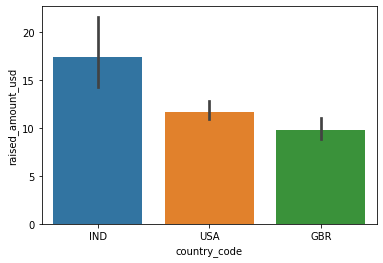

In [105]:
### Create a bar plot for distribution of funding amount for top three countries
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='country_code', y='raised_amount_usd', data=df_coun)
plt.show()

### Checkpoint 4 Sector Analysis 1

In [107]:
#### Now we will find the sector wise analysis and merge it with mapping file
### splitting vertical bar and getting value for some companies in category list.
#df["category_list"] = df["category_list"].str.split("|").str.get(0)
#df.head()
df_coun["category_list"] = df_coun["category_list"].str.split("|").str.get(0)
df_coun.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1.7
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8.9
22,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5.0


In [108]:
df["category_list"] = df_coun["category_list"].str.split("|").str.get(0)
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1.7
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8.9
22,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5.0


In [109]:
### Pandas read_csv() function imports a CSV file to DataFrame form.
mapping = pd.DataFrame(pd.read_csv(r"C:\Users\alex\Documents\Python Scripts\Assignments\mapping.csv", encoding= 'ANSI'))

In [110]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [113]:
mapping.shape

(688, 10)

In [114]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [115]:
###Now merge data frame with each primary sector mapped to its main sector.
lng_frame = pd.melt(mapping, id_vars=['category_list'], var_name='main_sector')

In [116]:
lng_frame.head()

,category_list,main_sector,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [117]:
lng_frame = lng_frame[lng_frame['value']==1]
lng_frame = lng_frame.drop('value',1)

In [118]:
lng_frame.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [144]:
####Now merge the mapping file with longer data frame
df_lng = pd.merge(df, lng_frame, on = 'category_list', how = 'inner')

In [145]:
df_lng.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.0,Entertainment
1,/organization/90min,90min,Media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15.0,Entertainment
2,/organization/90min,90min,Media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5.8,Entertainment
3,/organization/90min,90min,Media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18.0,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5.0,Entertainment


In [146]:
df_lng.shape

(36402, 9)

In [147]:
df_lng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36402 entries, 0 to 36401
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                36402 non-null  object 
 1   name                     36402 non-null  object 
 2   category_list            36187 non-null  object 
 3   status                   36402 non-null  object 
 4   country_code             36402 non-null  object 
 5   funding_round_permalink  36402 non-null  object 
 6   funding_round_type       36402 non-null  object 
 7   raised_amount_usd        36402 non-null  float64
 8   main_sector              36402 non-null  object 
dtypes: float64(1), object(8)
memory usage: 2.8+ MB


### Checkpoint 5: Sector Analysis 2


### Now merge is completed, let us find out the top three english speaking countries which is suitable type of funding amount.

In [148]:
df_lng.shape

(36402, 9)

In [150]:
df_lng.describe()

,raised_amount_usd
count,36402.000000
mean,11.742368
std,99.463875
min,0.000000
25%,1.600000
50%,5.000000
75%,12.000000
max,17600.000000


In [151]:
df_lng.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'raised_amount_usd',
       'main_sector'],
      dtype='object')

In [152]:
df_lng['raised_amount_usd'].describe()

count    36402.000000
mean        11.742368
std         99.463875
min          0.000000
25%          1.600000
50%          5.000000
75%         12.000000
max      17600.000000
Name: raised_amount_usd, dtype: float64

In [153]:
df_lng.median()

raised_amount_usd    5.0
dtype: float64

In [167]:
#### Let us find the spark funds between range of  5 to 15 million USD.
df_lng = df_lng[(df_lng['raised_amount_usd'] >= 5.000000) & (df_lng['raised_amount_usd'] <= 15.000000)]
df_lng.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.0,Entertainment
1,/organization/90min,90min,Media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15.0,Entertainment
2,/organization/90min,90min,Media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5.8,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5.0,Entertainment
14,/organization/chefs-feed,ChefsFeed,Media,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,5.0,Entertainment


In [128]:
#####creatinf datframe for first three top countries USA,IND,GBR on "venture" type of investment
df1  = df_coun[df_coun == 'USA']

df2 = df_coun[df_coun == 'GBR']

df3 = df_coun[df_coun == 'IND']

In [158]:
df1.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_usd
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,USA,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,USA,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,USA,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,USA,NaN,NaN,NaN


In [166]:
# groupby country, sector and find the count and sum
df_lng.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count', 'sum'], df1, df2, df3)

count        sum
country_code main_sector                                              
GBR          Automotive & Sports                         44     480.90
             Blanks                                      14     172.82
             Cleantech / Semiconductors                 433    5028.74
             Entertainment                              133    1141.30
             Health                                     118    1046.61
             Manufacturing                              122    1019.30
             News, Search and Messaging                 241    2955.99
             Others                                     507    4400.42
             Social, Finance, Analytics, Advertising    318    2851.11
IND          Automotive & Sports                         31    1556.35
             Blanks                                       5     130.35
             Cleantech / Semiconductors                  54     786.45
             Entertainment                               75     975.71
             Health                                      42     564.37
             Manufacturing                               55     730.26
             News, Search and Messaging                 130    1739.60
             Others                                     281    6318.52
             Social, Finance, Analytics, Advertising     77     866.77
USA          Automotive & Sports                        505   11632.14
             Blanks                                     196    2442.82
             Cleantech / Semiconductors                7849  118764.32
             Entertainment                             1756   16567.87
             Health                                    3263   31660.91
             Manufacturing                             2453   24845.23
             News, Search and Messaging                4301   44619.16
             Others                                    8243   82084.59
             Social, Finance, Analytics, Advertising   5156   62063.07

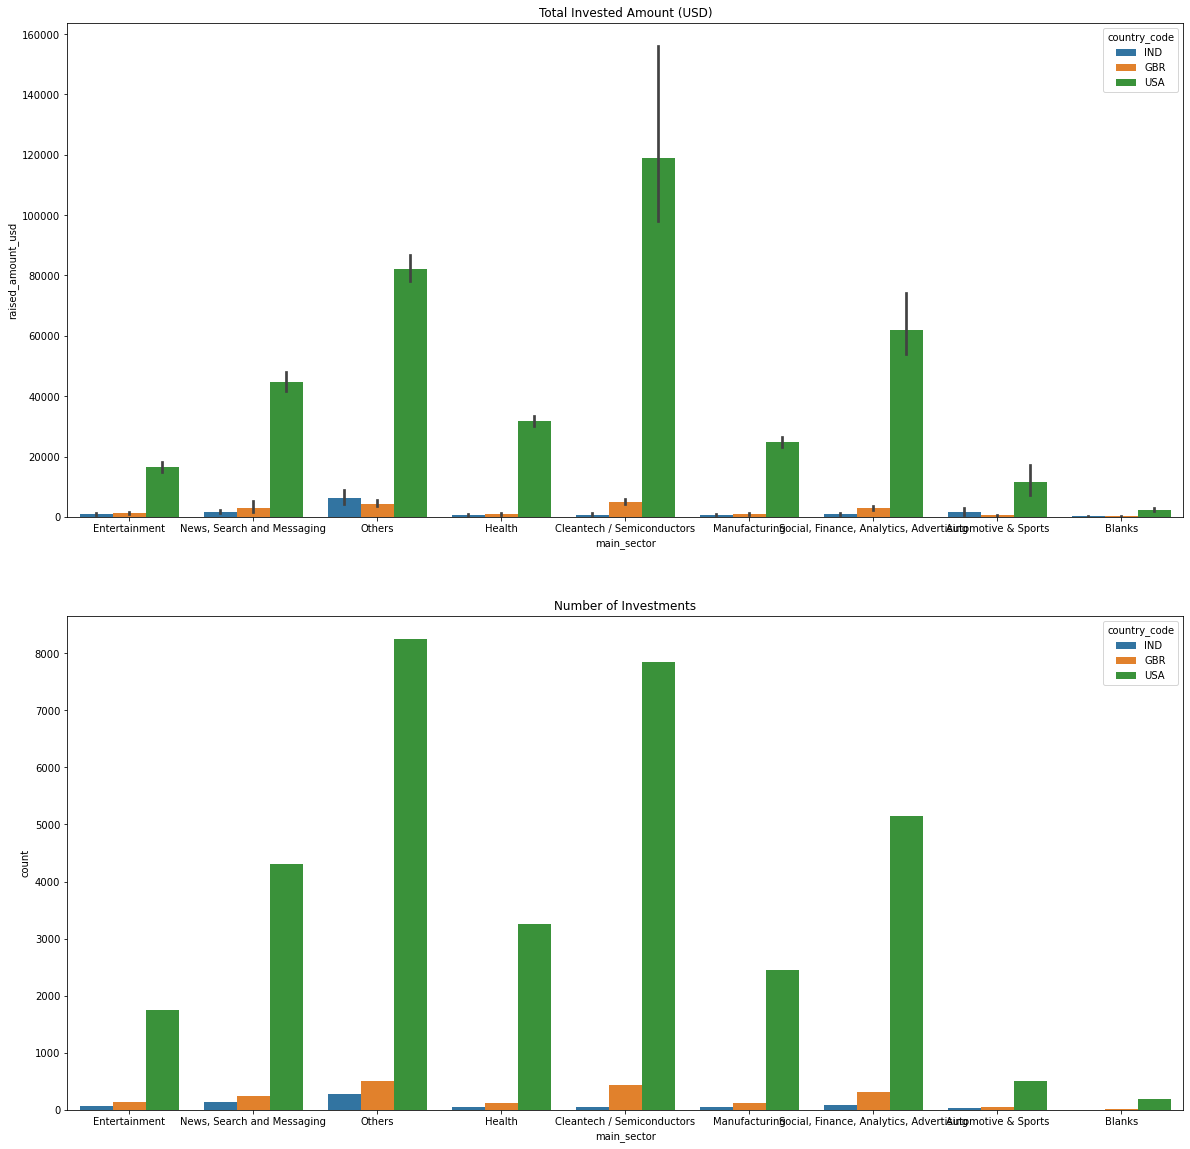

In [164]:
###plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(20, 20))

plt.subplot(2, 1, 1)
x = sns.barplot(x='main_sector', y='raised_amount_usd', hue='country_code', data=df_lng, estimator=np.sum)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
y = sns.countplot(x='main_sector', hue='country_code', data=df_lng)
plt.title('Number of Investments')

plt.show()